<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/mlc_2324_w6_lab_prep1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

import sys
if 'google.colab' in sys.modules:
    !pip install -q dtreeviz
import dtreeviz

In [ ]:
adv = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6G7V0015-2324/main/datasets/Advertising.csv',
    index_col=0
)

In [ ]:
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
X, y = adv.drop(columns='sales'), adv['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [ ]:
print(export_text(dtr, feature_names=X.columns.to_list()))

|--- TV <= 130.25
|   |--- value: [9.95]
|--- TV >  130.25
|   |--- value: [17.21]



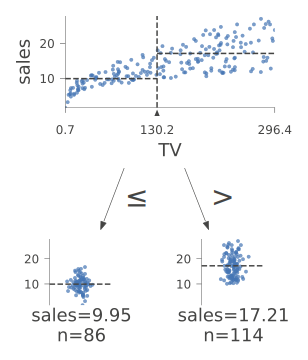

In [ ]:
dtv = dtreeviz.model(dtr, X, y, feature_names=X.columns.tolist(), target_name='sales')
dtv.view(fontname='sans-serif', scale=2)

In [ ]:
mean_absolute_error(y_test, dtr.predict(X_test)), mean_absolute_error(y_train, dtr.predict(X_train))

(3.270034270813933, 3.0016057614701683)